In [83]:
import numpy as np
import matplotlib.pyplot as plt

#Sampling frequency
#The sampling frequency is the number of samples obtained in one second. It is measured in Hertz (Hz).
f_s=32
#Fundamental period
#Number of samples
N=128
#Time of sampling in seconds
T=N/f_s
function = lambda x:  4*np.cos(2*np.pi*3*x-np.pi/7)+3*np.cos(5*np.pi*0.5*x+np.pi/4)-3*np.cos(2*np.pi*2*x+np.pi/7)


print(f'Sampling {N} datapoints during {T} seconds: sampling frequency  {f_s}Hz Frequency resolution {1/T}Hz')
print(f'Can detect at most a frequency of {np.floor(f_s/2)}Hz')

Sampling 128 datapoints during 4.0 seconds: sampling frequency  32Hz Frequency resolution 0.25Hz
Can detect at most a frequency of 16.0Hz


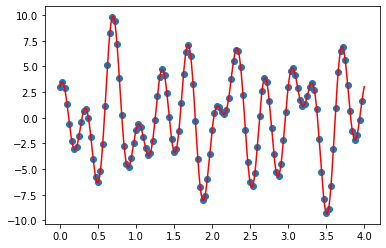

In [77]:
x=np.arange(0,T,1/f_s)



#Function 
y=function(x)
# y=np.cos(2*np.pi*2*x)

plt.scatter(x,y)
x1=np.linspace(0,T,10000)
y1=function(x1)
plt.plot(x1,y1, c='r')

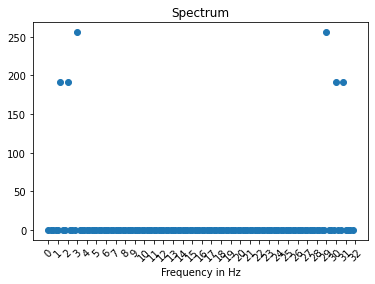

In [85]:
#Calculate Fourier coefficients
test_frequency=np.arange(0,f_s,1/T)
fy=np.fft.fft(y)#[0:len(test_frequency)]


# plt.figure(figsize=(10,6))
plt.scatter(test_frequency,np.abs(fy))
plt.title("Spectrum")
plt.xlabel("Frequency in Hz")
plt.xticks(np.arange(min(test_frequency), max(test_frequency)+1, 1))
plt.xticks(rotation=45)
plt.show()


In [79]:
# fy

In [80]:
rfy=np.round(fy,3)
# rfy

Phasor at frequency 1.25 Hz: A=3.000011004618488 phase=0.7853981633974483
Phasor at frequency 2.0 Hz: A=3.0000018649082745 phase=-2.6927921405024735
Phasor at frequency 3.0 Hz: A=3.9999979669184285 phase=-0.4487981668147994


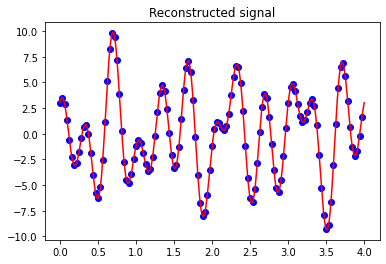

+3.000011004618488*np.cos(2*np.pi*1.25*x+0.7853981633974483)+3.0000018649082745*np.cos(2*np.pi*2.0*x+-2.6927921405024735)+3.9999979669184285*np.cos(2*np.pi*3.0*x+-0.4487981668147994)


In [81]:
precision=1e-3
str_function=''
for k in range(0,len(rfy)//2):
    if np.abs(rfy[k])>precision:
        print(f'Phasor at frequency {k/T} Hz: A={np.abs(rfy[k])*2/N} phase={np.angle(rfy[k])}')
        str_function+=f'+{np.abs(rfy[k])*2/N}*np.cos(2*np.pi*{k/T}*x+{np.angle(rfy[k])})'
ff_lambda=lambda x: eval(str_function)
plt.plot(x1,y1, c='r')
plt.scatter(x,ff_lambda(x), c='b')
plt.title("Reconstructed signal")
plt.show()

print(str_function)

In [84]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

In [86]:
FFT(y)

array([ 1.33226763e-14+0.00000000e+00j, -6.25279625e-14+3.93947640e-14j,
       -5.74857113e-14-1.26506434e-14j, -4.27768579e-14+1.52367560e-14j,
       -1.32259076e-13-1.44071900e-13j,  1.35764502e+02+1.35764502e+02j,
        3.79614560e-14-8.18622624e-14j,  9.58848693e-14+1.36799461e-14j,
       -1.72986023e+02-8.33056779e+01j,  9.48320235e-14-4.38232015e-14j,
        5.95719515e-14+5.44295576e-14j,  1.46883263e-14+1.19743210e-13j,
        2.30648030e+02-1.11074237e+02j,  1.09621798e-13+7.54475274e-14j,
        7.17883163e-14+1.04147413e-13j, -3.32376840e-15+1.31310889e-13j,
       -1.14548871e-13+3.70988152e-14j, -1.05492516e-13+4.32325018e-15j,
        2.10045131e-14-1.25805371e-13j,  1.26501509e-13+1.01995370e-13j,
       -9.06867787e-14+1.39988315e-13j, -1.54391326e-13+2.06672439e-16j,
       -6.13093366e-14-7.52928822e-14j,  4.52500242e-15-5.79608263e-14j,
        4.59371253e-14+4.75299544e-14j, -9.94107551e-14-7.44095215e-14j,
       -1.50591435e-14-7.30644012e-14j, -1.56860651

In [87]:
fy

array([ 1.33226763e-14+0.00000000e+00j, -6.66133815e-14+4.21884749e-14j,
       -5.71041619e-14-9.27642557e-15j, -3.99680289e-14-5.32907052e-15j,
       -1.22568622e-13-1.50990331e-13j,  1.35764502e+02+1.35764502e+02j,
        4.17320467e-14-7.60690665e-14j,  1.15939583e-13+1.85960546e-14j,
       -1.72986023e+02-8.33056779e+01j,  9.32205400e-14-4.84714912e-14j,
        4.38867229e-14+5.64234687e-14j,  1.40791995e-14+1.26061342e-13j,
        2.30648030e+02-1.11074237e+02j,  9.76701200e-14+5.41295476e-14j,
        7.85834883e-14+9.95196030e-14j,  1.19808061e-15+1.32535325e-13j,
       -1.14548871e-13+3.70988152e-14j, -9.67435125e-14+6.54896212e-15j,
        2.26990034e-14-1.27204485e-13j,  1.30260625e-13+1.04403355e-13j,
       -8.17124146e-14+1.49213975e-13j, -1.63320247e-13+1.93323003e-15j,
       -6.04376913e-14-7.59977191e-14j,  4.38287182e-15-5.52434488e-14j,
        2.84217094e-14+3.90798505e-14j, -1.01469675e-13-7.60069488e-14j,
       -1.44982080e-14-7.34726690e-14j,  0.00000000